# Exercise 3: Advanced Information Retrieval


## 1.  Introducing Word Embeddings

In this exercise, we would train word embeddings using a state-of-the-art embeddings library fastText. The first step of the exercise is to install the fasttext library. Proceed with the following steps:

### FastText installation

> pip install fasttext

If you are having problems, try this command:
> sudo apt-get install g++

### Generate Embeddings

In [42]:
import fasttext
import numpy as np

In [43]:
model = fasttext.train_unsupervised('epfldocs.txt', model = 'cbow')
vocabulary = model.words # Vocabulary is the reduced dimensionality from the original document.
word_embeddings = np.array([model[word] for word in vocabulary])

### Use Pretrained Embeddings
If you are unable to install fasttext, you can use the preembeddings we provide.

In [44]:
import sys
import codecs
import numpy as np

# Edit this, or just move model_epfldocs.vec to the directory where this notebook is situated
directory_path = './'

def load_embeddings(file_name):
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        lines = f_in.readlines()
        lines = lines[1:]
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in lines])
    wv = np.loadtxt(wv)
    return wv, vocabulary


# Replace the path based on your own machine.
word_embeddings, vocabulary = load_embeddings(directory_path + 'model_epfldocs.vec')




### Visualize Embeddings

In the third phase of this exercise, we will visualize the generated embeddings using t-SNE (T-Distributed Stochastic Neighbouring Entities). t-SNE is a dimensionality reduction algorithm which is well suited for such visualization tasks.


In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import logging

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, init = 'pca') 
vis_data = tsne.fit_transform(word_embeddings)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 432 samples in 0.009s...
[t-SNE] Computed neighbors for 432 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 0.022868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.697304
[t-SNE] KL divergence after 1000 iterations: 0.310199


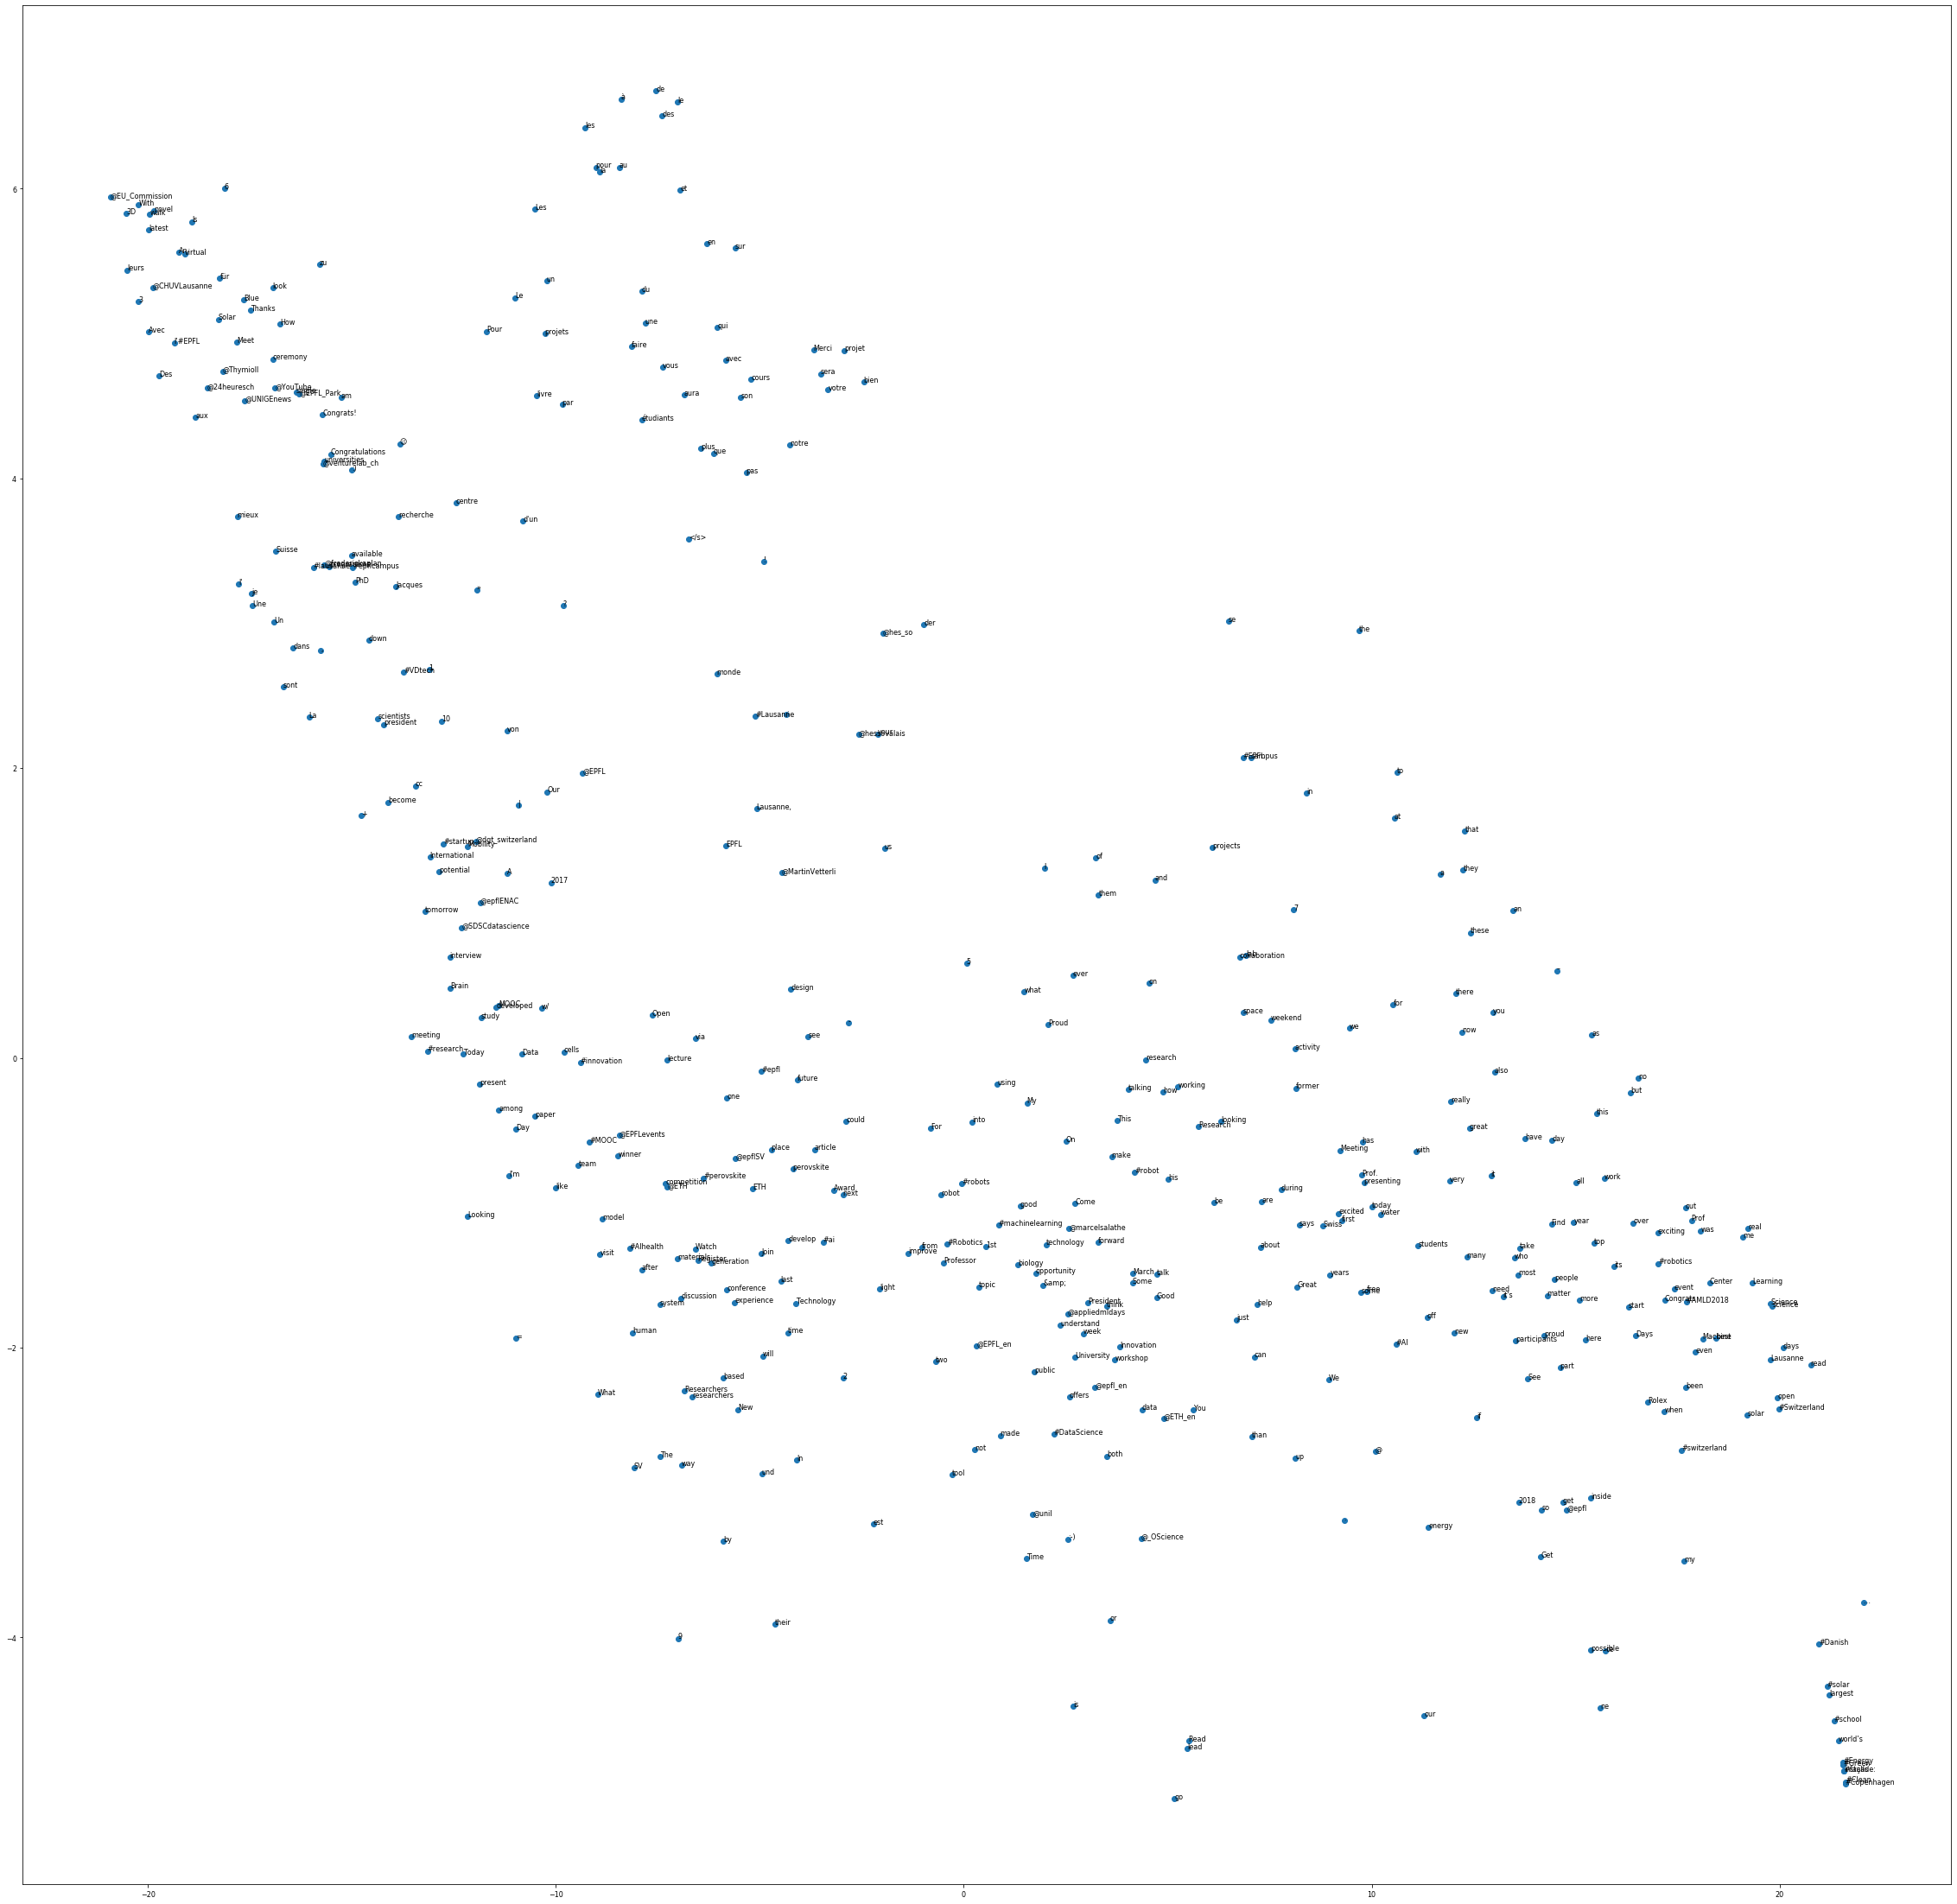

In [46]:
vis_data_x = vis_data[:,0]
vis_data_y = vis_data[:,1]

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(40, 40)) 
plt.scatter(vis_data_x, vis_data_y)

for label, x, y in zip(vocabulary, vis_data_x, vis_data_y):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

### Question 1. a

Observe the plot of word embeddings. Do you observe any patterns?

<b> You will not encounter a very obvious pattern (because the data is small and too much EPFL oriented) but some small patterns. </b>

Words are close to their context words i.e. Professor and MartinVetterli, President and MartinVetterli, Register and conference.

Similar words are clustered together: conference, workshop, discussion.

Stop words are not clustered together with other words because they cooccur with many words.

Artikels are close to each other (Une, du, des)

### Question 1. b

Write a python function to find the most similar terms for a given term. The similarity between two terms is defined as the cosine similarity between their corresponding word embeddings.

Find the top 5 terms that are most similar to 'la', 'EPFL', '#robot', 'this', 

**Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.

In [47]:
print(len(word_embeddings))
print(word_embeddings)
print(type(word_embeddings))

432
[[ 0.10873    0.063187  -0.024442  ...  0.0038217 -0.17276   -0.036689 ]
 [ 0.11822    0.054585  -0.014708  ... -0.0054659 -0.16563   -0.034043 ]
 [ 0.1484     0.065005  -0.0054718 ...  0.0057681 -0.16734   -0.034202 ]
 ...
 [ 0.11543    0.053498  -0.010841  ... -0.0054567 -0.16332   -0.028162 ]
 [ 0.11762    0.059127  -0.016053  ... -0.0039544 -0.16714   -0.029721 ]
 [ 0.12457    0.065536  -0.017464  ... -0.0047723 -0.17605   -0.027547 ]]
<class 'numpy.ndarray'>


In [48]:
print(len(vocabulary))
print(vocabulary)
print(type(vocabulary))

432
('</s>', '@EPFL', 'the', 'to', '@EPFL_en', 'of', 'and', 'in', 'a', 'de', 'for', 'at', 'on', '#epfl', 'with', 'via', 'is', 'la', 'à', '-', 'by', '#EPFL', 'et', 'from', '&amp;', 'les', 'des', 'pour', 'le', 'en', '!', 'The', 'you', 'are', 'an', 'our', '#VDtech', 'that', 'du', 'sur', 'be', 'EPFL', '@epfl', 'about', 'new', 'A', 'can', 'Swiss', 'have', 'I', 'au', ':', 'un', 'New', '|', 'more', 'it', 'will', '#Switzerland', 'has', 'une', 'first', '2018', '@MartinVetterli', 'all', 'students', 'par', 'Les', 'now', 'this', 'its', '@ETH_en', 'how', '2017', 'their', '@epfl_en', 'as', '@unil', 'dans', 'we', 'your', 'Lausanne', 'Avec', 'vous', '#innovation', 'talk', 'next', 'avec', 'work', '#epflcampus', 'my', '?', 'research', 'Learning', '@dgt_switzerland', 'up', 'day', 'This', 'Un', 'his', 'out', 'We', 'but', 'Thanks', '#AI', 'made', 'see', '#Lausanne', 'one', 'aux', 'Join', 'Le', 'people', 'est', 'La', 'great', 'could', 'sont', 'forward', '#research', 'what', 'ce', 'Great', 'not', 'Center', '

Word embedding is basically a vector 

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
# Cosine similarity takes 2D array as input. So it is a good idea to use .reshape(1,-1) for each vector as input to this function.

def find_most_similar(input_term, word_embeddings, vocabulary, num_terms=5):
    # Fill in your code
    term_embeddings_dict = {}
    for i, item in enumerate(vocabulary):
        term_embeddings_dict[item] = word_embeddings[i] # Vocabulary and word_embeddings (a vector) have basically the same structure.
    
    if input_term not in term_embeddings_dict:
        return "Term not in the vocabulary"
    
    input_term_embedding = term_embeddings_dict[input_term]
    term_similarities = []
    for term, embedding in term_embeddings_dict.items():
        term_similarities.append([term, cosine_similarity(input_term_embedding.reshape(1,-1),
                                                          embedding.reshape(1,-1))])
    
    sorted_terms = sorted(term_similarities, key = lambda x: x[1], reverse=True)[0:num_terms]
    
    return [x[0] for x in sorted_terms]

print(find_most_similar('EPFL', word_embeddings, vocabulary, num_terms=5))
print(find_most_similar('la', word_embeddings, vocabulary, num_terms=5))
print(find_most_similar('#robot', word_embeddings, vocabulary, num_terms=5))
print(find_most_similar('this', word_embeddings, vocabulary, num_terms=5))

['EPFL', '@EPFL', '#EPFL', 'programme', 'l’#EPFL']
['la', 'pour', 'sur', 'des', 'au']
['#robot', '#robots', 'robot', '#robotics', '#Robotics']
['this', 'This', 'there', 'research', '#research']


### Question 1. c [Optional]
​
Observe the word embeddings that are visualized in this link http://www.anthonygarvan.com/wordgalaxy/ . Can you make some interesting observations? 

## 2.  Basic Search Engine Using Word Embeddings



In this exercise, we would put our word embeddings to test by using them for information retrieval. 
The idea is that, the documents that have the most similar embedding vectors to the one belongs to query should rank higher.
The documents may not necessarily include the keywords in the query.



In [50]:
# Loading of libraries and documents
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
import math
from collections import Counter

# Read a list of documents from a file. Each line in a file is a document
with open("epfldocs.txt", ) as f:
    content = f.readlines()
        
original_documents = [x.strip() for x in content] 

In [51]:
print(len(original_documents))

1075


### Question 2. a
Since both the documents and the query is of variable size, we should aggregate the vectors of the words in the query by some strategy (reducing the total vector size to 1, i.e., we need to have only a single vector at the end). This could be taking the minimum vector, maximum vector or the mean. Fill in the code below.

In [89]:
# Create a dictionary of vectors for easier search
vector_dict = dict(zip(vocabulary, word_embeddings))

def aggregate_vector_list(vlist, aggfunc):
    if aggfunc == 'max':
        return np.array(vlist).max(axis=0) # Axis 0: rows (or indices) (taking the maximum among the first entry in the vectors)
    elif aggfunc == 'min':
        return np.array(vlist).min(axis=0)
    elif aggfunc == 'mean':
        return np.array(vlist).mean(axis=0)
    else:
        return np.zeros(np.array(vlist).shape[1])

possible_aggfuncs = ["max", "min", "mean"]

aggregated_doc_vectors = {}

# Aggregate vectors of documents beforehand
# TODO
for aggfunc in possible_aggfuncs:
    aggregated_doc_vectors[aggfunc] = np.zeros((len(original_documents), word_embeddings.shape[1]))
    for index, doc in enumerate(original_documents):
        # If the token is present in the current document,
        # then append the corresponding vector to the newly created list.
        vlist = [vector_dict[token] for token in fasttext.tokenize(doc) if token in vector_dict]
        
        if len(vlist) < 1:
            continue
        else:
            aggregated_doc_vectors[aggfunc][index] = aggregate_vector_list(vlist, aggfunc)
            
print(aggregated_doc_vectors['max'])

[[ 0.14316    0.066348  -0.0091323 ... -0.0011898 -0.17624   -0.033816 ]
 [ 0.14279    0.065841  -0.0094431 ...  0.0058253 -0.17624   -0.034205 ]
 [ 0.13438    0.067911  -0.015944  ... -0.0010079 -0.178     -0.031471 ]
 ...
 [ 0.14316    0.066348  -0.0091323 ...  0.0058253 -0.17562   -0.0308   ]
 [ 0.14279    0.065108  -0.0082775 ...  0.0058253 -0.18132   -0.035852 ]
 [ 0.1408     0.065108  -0.0082775 ... -0.0011544 -0.17624   -0.035678 ]]


### Question 2. b
Aggregate the query and find the most similar documents using cosine distance between the query's vector and document's aggregated vector. Are they seem to be relevant?

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

query = "EPFL"

def aggregate_query(query, aggfunc):
    # TODO
    # Raise an error message for the case when there is no words in the query that is included in the vocabulary
    # This should return a vector of shape (1, word_embeddings.shape[1])
    tokens = fasttext.tokenize(query)
    
    assert len(tokens) > 0
    found=False
    for item in tokens:
        if item in vocabulary:
            found=True
            break
    if not found:
        return "No word exists in the query that is included in the vocabulary."
    
    vlist=[]
    for token in tokens:
        if token in vocabulary:
            vlist.append(vector_dict[token])
    
    return aggregate_vector_list(vlist, aggfunc)
    
    
def get_most_similar_documents(query_vector, aggfunc, k = 5):
    # This produces from 1D array a 2D array whose 1st dimension (axis=0) is 1 -> [[...]]
    query_vector = query_vector.reshape(1,-1)
    # Calculate the similarity with each document vector. 
    # Hint: Cosine similarity function takes a matrix as input so you do not need to loop through each document vector.
    sim = cosine_similarity(query_vector, np.array(aggregated_doc_vectors[aggfunc])) # 2D matrix which contains the vector of each document
    
    # Rank the document vectors according to their cosine similarity with the query vector and return topk indexes
    indexes = np.argsort(sim, axis=-1, kind='quicksort', order=None) # This is sorted in ascending order
    indexes = indexes[0] # Take the first element in the array as there is only a single element [[...]]
    indexes = indexes[::-1] # Convert to descending    

    return indexes


def search_vec_embeddings(query, topk = 10, aggfunc = 'mean'):
    query_vector = aggregate_query(query, aggfunc)
    indexes = get_most_similar_documents(query_vector, aggfunc)
    # Print the top k documents
    indexes = indexes[0:topk]
    for index in indexes:
        print(original_documents[index])

In [91]:
search_vec_embeddings('EPFL', aggfunc = 'mean')

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
About p-value reliability @EPFL #openscience #oset2017 https://t.co/4SvpDoEDyH
signé @EPFL https://t.co/sRldB2O7PM
Working late @EPFL #OpenFood https://t.co/URxfSarxc4
Roboter-Aal #Envirobot gibt Auskunft über Wasserverschmutzung @EPFL @EawagResearch https://t.co/doj2hMEKBc
@EPFL  crypto-tokenize FREE ENERGY https://t.co/vH9qgLoqrr https://t.co/6uTnJ68pSC https://t.co/GTXLhI6LTE https://t.co/ZYenRAsEIr GET RICH
Researches Solve Century-old Physics Question, may Improve #DataStorage https://t.co/9QvU4lELi0 @EPFL @haltug @KTsakmakidis
Graphene-Based Nanotube Biosensor Could Detect Single Biomolecules Efficiently https://t.co/biwGqtdUFw @AUB_Lebanon @EPFL #graphene #medical https://t.co/786fY61I51
Ça bricole ça coupe ça colle #museomix #mxartlab #epflartlab @museomixCH @EPFL @EPFLArtLab https://t.co/IgEsfw6LEG
LES TRIAUDES @EPFL #Lausanne #SWITZERLAND ... IN PROGRESS #Architect: Richter Dahl Rocha &amp; Associés architectes

### Question 2. c
Compare the results with the vector space retrieval.


In [92]:
# VECTOR SPACE RETRIEVAL (From Exercise 1)
# Retrieval oracle 
from operator import itemgetter
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')
features = tf.fit_transform(original_documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, topk = 10, features = features, threshold=0.1):
    new_features = tf.transform([query])
    cosine_similarities = cosine_similarity(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold or i >= topk:
            break
        doc_ids.append(related_docs_indices[i])
    
    for index in doc_ids:
        print(original_documents[index])

In [93]:
search_vec_embeddings('EPFL', aggfunc = 'mean')
print("---------------------------------")
search_vec_sklearn("EPFL")

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
About p-value reliability @EPFL #openscience #oset2017 https://t.co/4SvpDoEDyH
signé @EPFL https://t.co/sRldB2O7PM
Working late @EPFL #OpenFood https://t.co/URxfSarxc4
Roboter-Aal #Envirobot gibt Auskunft über Wasserverschmutzung @EPFL @EawagResearch https://t.co/doj2hMEKBc
@EPFL  crypto-tokenize FREE ENERGY https://t.co/vH9qgLoqrr https://t.co/6uTnJ68pSC https://t.co/GTXLhI6LTE https://t.co/ZYenRAsEIr GET RICH
Researches Solve Century-old Physics Question, may Improve #DataStorage https://t.co/9QvU4lELi0 @EPFL @haltug @KTsakmakidis
Graphene-Based Nanotube Biosensor Could Detect Single Biomolecules Efficiently https://t.co/biwGqtdUFw @AUB_Lebanon @EPFL #graphene #medical https://t.co/786fY61I51
Ça bricole ça coupe ça colle #museomix #mxartlab #epflartlab @museomixCH @EPFL @EPFLArtLab https://t.co/IgEsfw6LEG
LES TRIAUDES @EPFL #Lausanne #SWITZERLAND ... IN PROGRESS #Architect: Richter Dahl Rocha &amp; Associés architectes

### Question 2. d
You will realize that not all the words in your queries are in the vocabulary, so your queries fail to retrieve any documents. Think of possible solutions to overcome this problem.

1. Use a bigger corpus
2. Try pretrained vectors (check glove)
3. Preprocess (lowercase, stem) (if the former 2 options are not available)
4. Use heuristics to find similar words and aggregate their vectors, i.e. get a word in the query's stem and the words that have the same stem, get the words with close edit distance to catch hashtags and mentions etc.
    Some examples:
    * MAGA -> What it stands for: Make America Great Again (What MAGA stands for)
    * MAGA -> Cooccuring words, i.e. TCOT (Top Conservatives on Twitter, likely precedes the slogan MAGA)
    * MAGA -> words of concept (Republican) = {Tcot, PJNET, Republic etc.} use the concept vector / average of the word vectors' belonging to that concept
    Use wordnet (https://wordnet.princeton.edu) but no MAGA unfortunately :(
5. Search the literature for more ideas.